In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
dataset = pd.read_csv('train.csv')
print(dataset)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [3]:
attr = dataset.drop('Survived', axis=1)
T = dataset['Survived']

In [4]:
dataset.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
dataset['Sex'] = dataset['Sex'].map({'male':0, 'female':1})
dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1, 'Q':2})
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())
dataset = dataset.dropna(subset=['Embarked'], axis=0)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int64  
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 90.3+ KB


In [8]:
dataset.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005028,-0.035330,-0.043136,0.031319,-0.057686,-0.001657,0.012703,-0.030555
Survived,-0.005028,1.000000,-0.335549,0.541585,-0.069822,-0.034040,0.083151,0.255290,0.108669
Pclass,-0.035330,-0.335549,1.000000,-0.127741,-0.336512,0.081656,0.016824,-0.548193,0.043835
Sex,-0.043136,0.541585,-0.127741,1.000000,-0.086506,0.116348,0.247508,0.179958,0.118593
Age,0.031319,-0.069822,-0.336512,-0.086506,1.000000,-0.232543,-0.171485,0.093707,-0.007165
SibSp,-0.057686,-0.034040,0.081656,0.116348,-0.232543,1.000000,0.414542,0.160887,-0.060606
Parch,-0.001657,0.083151,0.016824,0.247508,-0.171485,0.414542,1.000000,0.217532,-0.079320
Fare,0.012703,0.255290,-0.548193,0.179958,0.093707,0.160887,0.217532,1.000000,0.063462
Embarked,-0.030555,0.108669,0.043835,0.118593,-0.007165,-0.060606,-0.079320,0.063462,1.000000


In [9]:
X = dataset[['Pclass', 'Sex', 'Fare', 'Embarked']]
T = dataset['Survived']

In [10]:
np.random.seed(0)

In [15]:
X['Pclass'] = (X['Pclass'] - X['Pclass'].mean()) / X['Pclass'].std()
X['Sex'] = (X['Sex'] - X['Sex'].mean()) / X['Sex'].std()
X['Fare'] = (X['Fare'] - X['Fare'].mean()) / X['Fare'].std()
X['Embarked'] = (X['Embarked'] - X['Embarked'].mean()) / X['Embarked'].std()

/home/user/.pyenv/versions/3.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/user/.pyenv/versions/3.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/user/.pyenv/versions/3.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [16]:
X

,Pclass,Sex,Fare,Embarked
0,0.824744,-0.734928,-0.499958,-0.569364
1,-1.571327,1.359146,0.788503,1.002575
2,0.824744,1.359146,-0.486376,-0.569364
3,-1.571327,1.359146,0.422623,-0.569364
4,0.824744,-0.734928,-0.483861,-0.569364
...,...,...,...,...
886,-0.373291,-0.734928,-0.384258,-0.569364
887,-1.571327,1.359146,-0.042189,-0.569364
888,0.824744,1.359146,-0.173986,-0.569364
889,-1.571327,-0.734928,-0.042189,1.002575


In [17]:
train_x, test_x, train_t, test_t = train_test_split(X, T, test_size=0.3, stratify=T)

In [24]:
from keras.utils import to_categorical

In [25]:
train_t_hot = to_categorical(train_t)

In [26]:
train_t_hot[:3]

array([[1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, Adam, Adamax

In [57]:
model = Sequential()

In [58]:
model.add(Dense(input_dim=4, units=16, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=2, activation='sigmoid'))

In [59]:
#model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.5))
#model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.5))
model.compile(loss='binary_crossentropy', optimizer=Adamax(lr=0.5))

In [60]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_19 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_20 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 34        
Total params: 658
Trainable params: 658
Non-trainable params: 0
_________________________________________________________________


In [61]:
history = model.fit(train_x, train_t_hot, epochs=50, batch_size=16)

Epoch 1/50
39/39 [==============================] - 0s 1ms/step - loss: 2.1475
Epoch 2/50
39/39 [==============================] - 0s 1ms/step - loss: 0.5466
Epoch 3/50
39/39 [==============================] - 0s 1ms/step - loss: 0.4361
Epoch 4/50
39/39 [==============================] - 0s 1ms/step - loss: 0.4629
Epoch 5/50
39/39 [==============================] - 0s 1ms/step - loss: 0.4858
Epoch 6/50
39/39 [==============================] - 0s 1ms/step - loss: 0.4671
Epoch 7/50
39/39 [==============================] - 0s 1ms/step - loss: 0.4681
Epoch 8/50
39/39 [==============================] - 0s 1ms/step - loss: 0.4708
Epoch 9/50
39/39 [==============================] - 0s 1ms/step - loss: 0.4441
Epoch 10/50
39/39 [==============================] - 0s 1ms/step - loss: 0.4633
Epoch 11/50
39/39 [==============================] - 0s 1ms/step - loss: 0.4573
Epoch 12/50
39/39 [==============================] - 0s 1ms/step - loss: 0.4706
Epoch 13/50
39/39 [==============================

In [62]:
Y = np.argmax(model.predict(test_x), axis=-1)

In [63]:
accuracy_score(test_t, Y)

0.8052434456928839

In [64]:
from matplotlib import pyplot as plt

KeyError: 'accuracy'

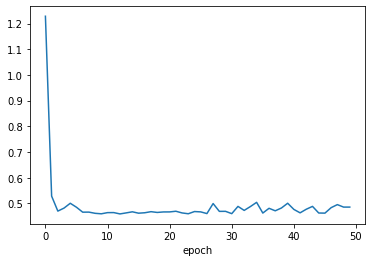

In [65]:
plt.plot(history.history['loss'],label='loss')
plt.xlabel('epoch')
plt.plot(history.history['accuracy'],label='accuracy')
plt.legend()
plt.ylim(0,1)
plt.show()

In [67]:
type(history)

tensorflow.python.keras.callbacks.History

In [70]:
print(history.history)

{'loss': [1.2282280921936035, 0.5285884737968445, 0.4703513979911804, 0.4821314811706543, 0.5008124113082886, 0.48533758521080017, 0.4661867320537567, 0.466411828994751, 0.46175381541252136, 0.45983773469924927, 0.4643988311290741, 0.4645618200302124, 0.45939764380455017, 0.46335816383361816, 0.467610239982605, 0.4622264504432678, 0.4639383852481842, 0.46811893582344055, 0.46513327956199646, 0.467070072889328, 0.4671652317047119, 0.46980929374694824, 0.4632242023944855, 0.4600518047809601, 0.4686339199542999, 0.46728387475013733, 0.46073073148727417, 0.49965718388557434, 0.469287246465683, 0.46942979097366333, 0.46046069264411926, 0.48864465951919556, 0.47307926416397095, 0.4880122244358063, 0.5044035911560059, 0.4627756178379059, 0.481263667345047, 0.47151410579681396, 0.4824640154838562, 0.5009335875511169, 0.4768909215927124, 0.46356937289237976, 0.477641224861145, 0.4886859655380249, 0.46292898058891296, 0.4624597430229187, 0.48376601934432983, 0.4955560564994812, 0.485918253660202